In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import keras
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from keras.models import load_model

from sklearn.metrics import confusion_matrix

import random as rn
import datetime

In [2]:
# Reading de los modelos.

# Ruta donde están los modelos.

model_CDM = load_model(filepath = "../Versión 3 - actual/modelos/datasetCDM_2023_04_17_19_35")

model_GRD = load_model(filepath = "../Versión 3 - actual/modelos/datasetGRD_2023_04_17_20_53")

model_GRDT = load_model(filepath = "../Versión 3 - actual/modelos/datasetGRDT_2023_04_17_11_29")

model_SEV = load_model(filepath = "../Versión 3 - actual/modelos/datasetSEV_2023_04_17_22_09")

In [3]:
x = pd.read_csv("../../../Datos/Procesados/x_values.csv", dtype = int)
y_cdm = pd.read_csv("../../../Datos/Procesados/y_dummies_cdm.csv", dtype = int)
y_grdt = pd.read_csv("../../../Datos/Procesados/y_dummies_grdtipo.csv", dtype = int)
y_grd = pd.read_csv("../../../Datos/Procesados/y_dummies_grd.csv", dtype = int)
y_sev = pd.read_csv("../../../Datos/Procesados/y_dummies_sev.csv", dtype = int)

In [4]:
y = y_sev

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0, stratify = y)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state = 0, stratify = y_train)

In [6]:
y_prediction = model_SEV.predict(x_test)

# score = model_GRDT.evaluate(x_test, y_test, verbose = 1, batch_size = 128)

11900/11900 [==============================] - 20s 1ms/step


In [7]:
y_test_np = y_test.to_numpy(dtype = np.float32)

In [8]:
y_pred_classes = np.argmax(y_prediction, axis = 1, keepdims = True)
y_true_classes = np.argmax(y_test_np, axis = 1, keepdims = True)

In [9]:
cm = confusion_matrix(y_true_classes, y_pred_classes)

In [10]:
for i in range(len(cm)):
    sum = 0
    for y in cm[i]:
        sum = sum + y
    for index in range(len(cm[i])):
        cm[i][index] = round((cm[i][index] / sum) * 100, 4)

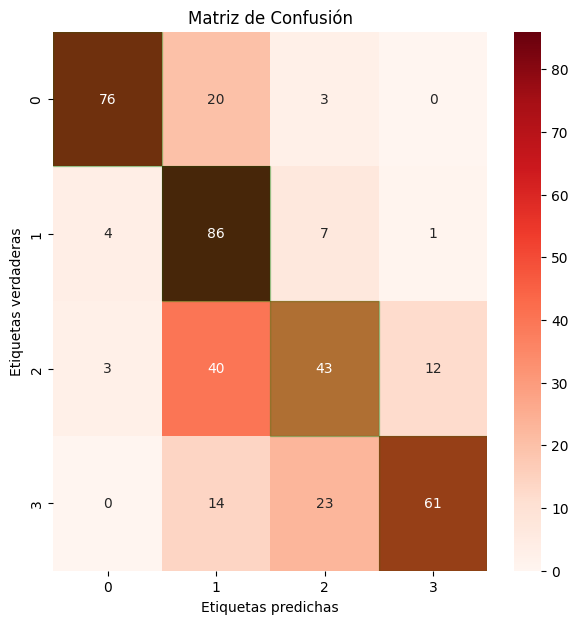

In [15]:
plt.figure(figsize=(7, 7))  # Ajusta el tamaño de la figura para que sea más fácil de leer

# Dibujar el mapa de calor completo con la paleta "Reds"
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=y_test.columns, yticklabels=y_test.columns)

# Cambiar el color de fondo de las celdas de la diagonal principal a verde
num_classes = len(y_test.columns)
for i in range(num_classes):
    ax.add_patch(plt.Rectangle((i, i), 1, 1, fill=True, color='green', alpha=0.3))

plt.ylabel('Etiquetas verdaderas')
plt.xlabel('Etiquetas predichas')
plt.title('Matriz de Confusión')
plt.show()